In [1]:
from scrna.datasets import *
from scrna.prc import *
from scrna.rmt import BiwhitenedCovarianceEstimator
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import seaborn as sns

# Small number of genes

In [11]:
methods = {
    'gene z-score + cell z-score': RightLeftWhiteningScaler(with_mean=True),
    'gene z-score + cell L2 norm': RightWhiteningLeftNormalizerScaler(with_mean=True),
    'gene z-score': WhiteningScaler(with_mean=True),
    'biwhitening': BiwhiteningScaler(with_mean=True),

}

scores = {}
rng = np.random.default_rng(123)
ngenes = 2500

# In the scLENS paper the tot coutns in the normalization is set to 1 instead of 10000
for dataset, info in DATASETS.items():
        

    print('processing dataset', dataset)
    _, _small, _, _ = get_subsampled_datasets(dataset, rng=rng)

    pr_pipeline = get_preprocessing_pipeline()
    pr_pipeline.set_params(highly_variable__num = ngenes)
    normlog = Pipeline(steps=[('norm', SizeNormalizer(use_obs='size_factor')),
                             ('log', LogNormalizer())], verbose=True)
    _small = normlog.fit_transform(pr_pipeline.fit_transform(_small))

    _scores = {}

    for (name, scaling) in methods.items():

        small = _small.copy()
        small = scaling.fit_transform(small)
        cov_est = BiwhitenedCovarianceEstimator().fit(small)

        _score = cov_est.score(small)
        _scores[name] = [_score[0], _score[1]]
    
    print(info['name']+'\n('+dataset+')')
    scores[info['name']+'\n('+dataset+')'] = _scores


processing dataset 10xchromiumv1
checking 68k_pbmc_celltypes.obs.txt
checking 68k_pbmc.matrix.mtx
reading file /mnt/home/vchardes/ceph/datasets/10XChromiumV1_Zheng17_68k_PBMC/68k_pbmc.matrix.mtx
found maching gene/features names
found matching barcodes
loading annotations file 68k_pbmc_celltypes.obs.txt
no separator identified in .txt file, falling back on default separator
no obs labels found in annotation file
obs is same shape as data, matching index to index
checking raw
checking 68k_pbmc.genes.tsv
checking 68k_pbmc.barcodes.tsv
passed cell quality filter, 68579 before, 68528 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total= 1.4min
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.1s
minimum number of cells 279.99999999999994
passed gene quality filter, 32738 before, 7416 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=   3.6s
passed resampling, size 3000
[Pipeline] .......... (step 1 o

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.5s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.3s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.0s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 526185.630251759 lim2 54193.18413927444
iter 5 lim1 10.60699856405045 lim2 0.21218882824820784
iter 10 lim1 1.414484084217282 lim2 0.0015769113528203427
iter 15 lim1 0.30489473484076957 lim2 0.00016957825598451493
iter 20 lim1 0.06887161292930832 lim2 2.7288373707801128e-05
iter 25 lim1 0.015685075492839484 lim2 5.207427967501843e-06
iter 30 lim1 0.0035795917429393143 lim2 1.072033881222012e-06
iter 35 lim1 0.0008175738388973564 lim2 2.288336173883465e-07
iter 40 lim1 0.00018681698590450324 lim2 4.978302525771028e-08
iter 45 lim1 4.270162441688541e-05 lim2 1.095200752310177e-08
iter 50 lim1 9.762939123802994e-06 lim2 2.4273174581423973e-09
iter 55 lim1 2.232566537863079e-06 lim2 5.409128700506471e-10
stopping criterion reached iter 59 lim1 9.212429756821905e-07 lim2 2.2021517942505398e-10
Zheng2017
(10xchromiumv1)
processing dataset multiome
checking GSE194122_openproblems_neurips2021_multiome_BMMC_ATAC.h5ad
checking GSE194122_openproblems_neurips2021_multiome_BMMC_merged.h

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.3s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.0s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.5s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.5s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ............... (step 2 of 2) Processing log, total=   0.2s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 344430.81551899546 lim2 56357.19201056936
iter 5 lim1 8.706581675539194 lim2 0.4068977067150761
iter 10 lim1 0.1929456745186897 lim2 0.001211939715692889
iter 15 lim1 0.004790619010991981 lim2 3.1009656248137674e-05
iter 20 lim1 0.0001193403354409206 lim2 7.642418657916039e-07
iter 25 lim1 2.9787229838262874e-06 lim2 1.8005103186169436e-08
stopping criterion reached iter 28 lim1 6.809899978366118e-07 lim2 3.987332464205906e-09
Luecken2021
(multiome)
processing dataset indrops
checking GSE102827_merged_all_raw_celltypes.obs.csv
checking raw
checking GSE102827_TMM_norm_cpm_bulk_extra.csv
checking GSE102827_merged_all_raw.dge.csv
reading file /mnt/home/vchardes/ceph/datasets/inDrops_GSE102827_10.1038_s41593-018-0112-6/GSE102827_merged_all_raw.dge.csv
no gene/features names file found, looking for ensembl annotations
no cell barcodes file found
loading annotations file GSE102827_merged_all_raw_celltypes.obs.csv
obs labels found in annotation file
passed cell quality filter, 655

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.9s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.5s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.3s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.5s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.1s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 307140.81934434705 lim2 86710.22617904563
iter 5 lim1 6.20720383139601 lim2 0.6915157235372511
iter 10 lim1 0.05646249719672092 lim2 0.002759321060511466
iter 15 lim1 0.0008013950118429536 lim2 9.366622255768675e-05
iter 20 lim1 2.691043505698154e-05 lim2 3.727213843118804e-06
iter 25 lim1 1.2191885983003914e-06 lim2 1.6371032418582843e-07
stopping criterion reached iter 27 lim1 6.804051067010874e-07 lim2 8.808838258822504e-08
Hrvatin2016
(indrops)
processing dataset smart-seq3xpress
checking E-MTAB-11452.sdrf.txt
checking PBMCs_allruns_umicounts_intronexon.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Smart-Seq3xpress_E-MTAB-11452_10.1038_s41587-022-01311-4/PBMCs_allruns_umicounts_intronexon.dge.txt
no gene/features names file found, looking for ensembl annotations


/mnt/home/vchardes/scrna/scrna/data.py:523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][isin] = annots.loc[data.adata.var_names[isin]]['gene_name']
/mnt/home/vchardes/scrna/scrna/data.py:525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][nans] = data.adata.var_names[nans]


no cell barcodes file found
checking PBMCs_allruns_umicounts_intronexon_barcode_annotation.txt
checking PBMCs_allruns_readcounts_intronexon.txt
passed cell quality filter, 43671 before, 40373 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total=  30.7s
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.3s
minimum number of cells 279.99999999999994
passed gene quality filter, 55560 before, 17210 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=  14.3s
passed resampling, size 3000
[Pipeline] .......... (step 1 of 9) Processing to_layer, total=   0.1s
minimum number of cells 20.999999999999996
passed gene quality filter, 17210 before, 16873 remaining
[Pipeline] ........ (step 2 of 9) Processing qc_genes_1, total=   3.9s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 3 of 9) Processing qc_cells_1, total=   0.3s
scanpy norm_factor are count per cells
[Pipeline] .....

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   2.9s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.9s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.3s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.9s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.1s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 270080.9823598155 lim2 49079.980622227624
iter 5 lim1 17.951579819164436 lim2 0.26906250123963793
iter 10 lim1 0.9780343464972532 lim2 0.0010504086275386904
iter 15 lim1 0.04799958431450091 lim2 4.225864380180688e-05
iter 20 lim1 0.0023370609944888265 lim2 1.7538992009846766e-06
iter 25 lim1 0.00011376601208423764 lim2 7.342191454817737e-08
iter 30 lim1 5.538683171879555e-06 lim2 3.137269555253397e-09
stopping criterion reached iter 34 lim1 9.03367012750067e-07 lim2 4.78679318405284e-10
Jensen2022
(smart-seq3xpress)
processing dataset drop-seq
checking GSE63472_P14Retina_merged.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Drop-Seq_GSE63472_10.1016_j.cell.2015.05.002/GSE63472_P14Retina_merged.dge.txt
no gene/features names file found, looking for ensembl annotations
no cell barcodes file found
checking retina_clusteridentities.txt
checking GSE63472_mm10_reference_metadata
checking .ipynb_checkpoints
checking GSE63472_P14Retina_log.txt
passed cell quality filter, 493

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.8s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.4s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.1s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 485255.6688692708 lim2 71922.09154317659
iter 5 lim1 16.540426768043552 lim2 0.6141255030126398
iter 10 lim1 1.5666554524656426 lim2 0.0035105901924723515
iter 15 lim1 0.13575619029426678 lim2 0.00015478847474126312
iter 20 lim1 0.01162052811358305 lim2 9.599836829021768e-06
iter 25 lim1 0.0009937876080230446 lim2 6.880850125234872e-07
iter 30 lim1 8.498173038362644e-05 lim2 5.3322190662896674e-08
iter 35 lim1 7.266988276022346e-06 lim2 4.317354029836906e-09
iter 40 lim1 6.214184000707945e-07 lim2 3.581650531714331e-10
stopping criterion reached iter 41 lim1 6.214184000707945e-07 lim2 3.581650531714331e-10
Macosko2015
(drop-seq)
processing dataset cite-seq
checking GSM3681518_MNC_RNA.obs.csv
checking GSM3681518_MNC_RNA.dge.tsv
reading file /mnt/home/vchardes/ceph/datasets/CITE-Seq_GSE128639_10.1016_j.cell.2019.05.031/GSM3681518_MNC_RNA.dge.tsv
no gene/features names file found, looking for ensembl annotations
no cell barcodes file found
loading annotations file GSM3681518_M

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.7s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.4s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.1s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 413486.0965272302 lim2 31639.799638811455
iter 5 lim1 12.779913447295328 lim2 0.17106709865064773
iter 10 lim1 1.841904042311782 lim2 0.003246305927388393
iter 15 lim1 0.4158644870796486 lim2 0.0005088887735604786
iter 20 lim1 0.10734385873406449 lim2 0.00010935677999035498
iter 25 lim1 0.028103728226683167 lim2 2.559895665976697e-05
iter 30 lim1 0.007386097765531119 lim2 6.216083646037873e-06
iter 35 lim1 0.0019439185840570694 lim2 1.537168191623195e-06
iter 40 lim1 0.0005119904476744708 lim2 3.8417258974021706e-07
iter 45 lim1 0.0001349162232644474 lim2 9.670253953153463e-08
iter 50 lim1 3.556615375366334e-05 lim2 2.4472863291435942e-08
iter 55 lim1 9.378878347732211e-06 lim2 6.220431059134057e-09
iter 60 lim1 2.473919176626538e-06 lim2 1.586943021436582e-09
stopping criterion reached iter 65 lim1 8.520187990690431e-07 lim2 5.333087305103845e-10
Stuart2019
(cite-seq)
processing dataset 10xchromiumv3
checking GSE111976_10x_donor_phase.csv
checking GSE111976_umap_endo_10x.c

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.3s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.1s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.2s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.4s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.7s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.3s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.7s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.2s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


iter 0 lim1 562402.9786235539 lim2 102220.58626802909
iter 5 lim1 12.23776825130318 lim2 1.2647193424730756
iter 10 lim1 2.4488624252540525 lim2 0.014278638310820657
iter 15 lim1 0.5427865206603366 lim2 0.0006194790617477519
iter 20 lim1 0.11634712650746026 lim2 7.575502150247715e-05
iter 25 lim1 0.02485753907199273 lim2 1.388404968882817e-05
iter 30 lim1 0.005308211718498157 lim2 2.8310656534635825e-06
iter 35 lim1 0.0011334549004060612 lim2 5.955153568049099e-07
iter 40 lim1 0.0002420234256765852 lim2 1.2637080804012157e-07
iter 45 lim1 5.167876740763688e-05 lim2 2.690944889138791e-08
iter 50 lim1 1.1034897744899297e-05 lim2 5.738652664177835e-09
iter 55 lim1 2.356271426862122e-06 lim2 1.2246361702494823e-09
stopping criterion reached iter 59 lim1 9.330389092454539e-07 lim2 4.848379475674847e-10
Wang2020
(10xchromiumv3)


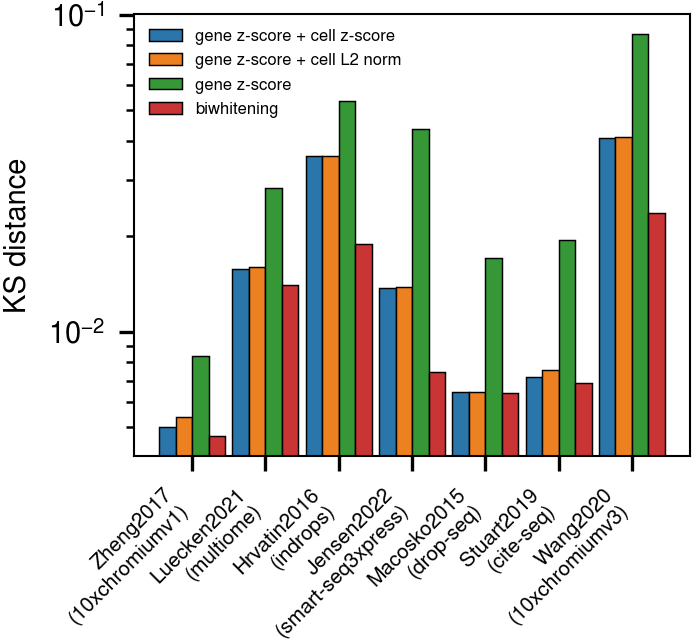

In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scrna

json.dump(scores, open('figures/scalings_%d.json' % ngenes, 'w'))
#scores = json.load(open('figures/scalings.json'))
# Assuming scores is defined
data = scores
categories = list(data.keys())
methods = list(next(iter(data.values())).keys())

values = {method: [data[cat][method][0] for cat in categories] for method in methods}

x = np.arange(len(categories))  # label locations
width = 0.9 / len(methods)      # adaptive width based on number of methods

figsize = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(figsize=[figsize[0], 0.8*figsize[1]])

cmap = iter(sns.color_palette('tab10', desat=0.85))

for i, method in enumerate(methods):
    offset = (i - (len(methods) - 1) / 2) * width
    bar_positions = x + offset
    ax.bar(bar_positions, values[method], width=width, label=method,
           color=next(cmap), edgecolor='black', linewidth=0.35)

ax.set_ylabel('KS distance')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize = 5)
ax.tick_params(axis='y')

ax.legend(fontsize=4, loc='upper left', frameon=False)

fig.savefig('figures/scalings_%d.pdf' % ngenes, dpi=300)


# Large number of genes

In [5]:
methods = {
    'gene z-score + cell z-score': RightLeftWhiteningScaler(with_mean=True),
    'gene z-score + cell L2 norm': RightWhiteningLeftNormalizerScaler(with_mean=True),
    'gene z-score': WhiteningScaler(with_mean=True),
    'biwhitening': BiwhiteningScaler(with_mean=True),

}

scores = {}
rng = np.random.default_rng(123)
ngenes = 10000
# In the scLENS paper the tot coutns in the normalization is set to 1 instead of 10000
for dataset, info in DATASETS.items():
    
    print('processing dataset', dataset)
    _, _small, _, _ = get_subsampled_datasets(dataset, rng=rng)

    pr_pipeline = get_preprocessing_pipeline()
    pr_pipeline.set_params(highly_variable__num = ngenes)
    normlog = Pipeline(steps=[('norm', SizeNormalizer(use_obs='size_factor')),
                             ('log', LogNormalizer())], verbose=True)
    _small = normlog.fit_transform(pr_pipeline.fit_transform(_small))

    _scores = {}

    for (name, scaling) in methods.items():

        small = _small.copy()
        small = scaling.fit_transform(small)
        cov_est = BiwhitenedCovarianceEstimator().fit(small)

        _score = cov_est.score(small)
        _scores[name] = [_score[0], _score[1]]
    
    print(info['name']+'\n('+dataset+')')
    scores[info['name']+'\n('+dataset+')'] = _scores


processing dataset 10xchromiumv1
checking 68k_pbmc_celltypes.obs.txt
checking 68k_pbmc.matrix.mtx
reading file /mnt/home/vchardes/ceph/datasets/10XChromiumV1_Zheng17_68k_PBMC/68k_pbmc.matrix.mtx
found maching gene/features names
found matching barcodes
loading annotations file 68k_pbmc_celltypes.obs.txt
no separator identified in .txt file, falling back on default separator
no obs labels found in annotation file
obs is same shape as data, matching index to index
checking raw
checking 68k_pbmc.genes.tsv
checking 68k_pbmc.barcodes.tsv
passed cell quality filter, 68579 before, 68528 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total= 1.4min
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.1s
minimum number of cells 279.99999999999994
passed gene quality filter, 32738 before, 7416 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=   3.5s
passed resampling, size 3000
[Pipeline] .......... (step 1 o

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.0s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.8s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   0.8s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.1s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 2123355.028863917 lim2 372265.5931107808
iter 5 lim1 9.401628157847213 lim2 1.5451070728675107
iter 10 lim1 1.038663201731687 lim2 0.0048777890141935565
iter 15 lim1 0.2861238041988301 lim2 0.0005930046673747746
iter 20 lim1 0.08899485598007129 lim2 0.0001225630215615503
iter 25 lim1 0.02846252386776893 lim2 2.8625751594013593e-05
iter 30 lim1 0.009181632767951697 lim2 7.1210524750231485e-06
iter 35 lim1 0.0029726324930452463 lim2 1.8481542713999488e-06
iter 40 lim1 0.0009643347573069505 lim2 4.95533022615291e-07
iter 45 lim1 0.00031323979031805393 lim2 1.3644305152382685e-07
iter 50 lim1 0.00010184179399796989 lim2 3.841704421247982e-08
iter 55 lim1 3.313398839344117e-05 lim2 1.102434854516332e-08
iter 60 lim1 1.0785763780329916e-05 lim2 3.215677946144524e-09
iter 65 lim1 3.5124344224257698e-06 lim2 9.512939325162506e-10
iter 70 lim1 1.144219124782353e-06 lim2 2.8488034153895114e-10
stopping criterion reached iter 72 lim1 9.14332430212994e-07 lim2 2.2413493283579555e-10
Zh

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.2s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   2.3s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.6s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.3s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   1.6s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ............... (step 2 of 2) Processing log, total=   0.3s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 2910955.3413149794 lim2 515608.4926365814
iter 5 lim1 27.24991886262798 lim2 2.760578642537015
iter 10 lim1 1.5969447643220498 lim2 0.011450873982645993
iter 15 lim1 0.19182121006769703 lim2 0.0002463576124183131
iter 20 lim1 0.023418517685358964 lim2 1.4893835454055093e-05
iter 25 lim1 0.002864798966662807 lim2 1.1495987561893628e-06
iter 30 lim1 0.00035069127324338645 lim2 1.021049507166083e-07
iter 35 lim1 4.294501389279226e-05 lim2 1.0319659127233649e-08
iter 40 lim1 5.260133598694594e-06 lim2 1.1213525663578139e-09
stopping criterion reached iter 45 lim1 9.806427314629218e-07 lim2 1.9512969018364856e-10
Luecken2021
(multiome)
processing dataset indrops
checking GSE102827_merged_all_raw_celltypes.obs.csv
checking raw
checking GSE102827_TMM_norm_cpm_bulk_extra.csv
checking GSE102827_merged_all_raw.dge.csv
reading file /mnt/home/vchardes/ceph/datasets/inDrops_GSE102827_10.1038_s41593-018-0112-6/GSE102827_merged_all_raw.dge.csv
no gene/features names file found, looking fo

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   2.3s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.7s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.3s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   1.7s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.2s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 2698824.7799291275 lim2 470183.78039687354
iter 5 lim1 23.66590563591061 lim2 2.2267206094957306
iter 10 lim1 1.3046212090021045 lim2 0.004666179472767817
iter 15 lim1 0.12873560893399372 lim2 0.00018428066228715068
iter 20 lim1 0.01333875507248039 lim2 1.2418145130643765e-05
iter 25 lim1 0.0013970205397602076 lim2 9.459473064854507e-07
iter 30 lim1 0.00014651482123606563 lim2 7.785962918838152e-08
iter 35 lim1 1.5378751690109382e-05 lim2 6.762894688705501e-09
iter 40 lim1 1.6151298021238603e-06 lim2 6.104470262613404e-10
stopping criterion reached iter 43 lim1 6.558050413829619e-07 lim2 2.3523294423455354e-10
Hrvatin2016
(indrops)
processing dataset smart-seq3xpress
checking E-MTAB-11452.sdrf.txt
checking PBMCs_allruns_umicounts_intronexon.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Smart-Seq3xpress_E-MTAB-11452_10.1038_s41587-022-01311-4/PBMCs_allruns_umicounts_intronexon.dge.txt
no gene/features names file found, looking for ensembl annotations


/mnt/home/vchardes/scrna/scrna/data.py:523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][isin] = annots.loc[data.adata.var_names[isin]]['gene_name']
/mnt/home/vchardes/scrna/scrna/data.py:525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][nans] = data.adata.var_names[nans]


no cell barcodes file found
checking PBMCs_allruns_umicounts_intronexon_barcode_annotation.txt
checking PBMCs_allruns_readcounts_intronexon.txt
passed cell quality filter, 43671 before, 40373 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total=  31.7s
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.3s
minimum number of cells 279.99999999999994
passed gene quality filter, 55560 before, 17210 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=  14.2s
passed resampling, size 3000
[Pipeline] .......... (step 1 of 9) Processing to_layer, total=   0.0s
minimum number of cells 20.999999999999996
passed gene quality filter, 17210 before, 16873 remaining
[Pipeline] ........ (step 2 of 9) Processing qc_genes_1, total=   4.0s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 3 of 9) Processing qc_cells_1, total=   0.3s
scanpy norm_factor are count per cells
[Pipeline] .....

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   4.2s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.9s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.4s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   1.8s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ............... (step 2 of 2) Processing log, total=   0.3s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 2118663.139835007 lim2 363605.53174911404
iter 5 lim1 23.702137864070544 lim2 1.776685338989739
iter 10 lim1 1.021381376579785 lim2 0.002988224670914308
iter 15 lim1 0.06707658098206903 lim2 6.826900212941744e-05
iter 20 lim1 0.004450714611081263 lim2 3.057898152469818e-06
iter 25 lim1 0.0002959152257249187 lim2 1.524102943850636e-07
iter 30 lim1 1.9694776659306967e-05 lim2 8.083774982736713e-09
iter 35 lim1 1.3115935164620396e-06 lim2 4.4733972082156015e-10
stopping criterion reached iter 37 lim1 7.629764888772428e-07 lim2 2.517888120223688e-10
Jensen2022
(smart-seq3xpress)
processing dataset drop-seq
checking GSE63472_P14Retina_merged.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Drop-Seq_GSE63472_10.1016_j.cell.2015.05.002/GSE63472_P14Retina_merged.dge.txt
no gene/features names file found, looking for ensembl annotations
no cell barcodes file found
checking retina_clusteridentities.txt
checking GSE63472_mm10_reference_metadata
checking .ipynb_checkpoints
checkin

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   2.0s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.3s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   1.3s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.1s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 3269057.194343038 lim2 499102.7591378523
iter 5 lim1 31.237338889471815 lim2 2.364640662826476
iter 10 lim1 3.168932385165107 lim2 0.02536853626069968
iter 15 lim1 0.44419400442895274 lim2 0.000664298553653575
iter 20 lim1 0.06250464352258067 lim2 5.193727613295174e-05
iter 25 lim1 0.008802769954956435 lim2 5.519752133364975e-06
iter 30 lim1 0.0012400833118495491 lim2 6.60736764412917e-07
iter 35 lim1 0.00017472360922754504 lim2 8.396692940948469e-08
iter 40 lim1 2.462070605746547e-05 lim2 1.101325985963797e-08
iter 45 lim1 3.469656408849886e-06 lim2 1.4701986295051483e-09
stopping criterion reached iter 50 lim1 7.235977053099418e-07 lim2 2.9589708461230657e-10
Macosko2015
(drop-seq)
processing dataset cite-seq
checking GSM3681518_MNC_RNA.obs.csv
checking GSM3681518_MNC_RNA.dge.tsv
reading file /mnt/home/vchardes/ceph/datasets/CITE-Seq_GSE128639_10.1016_j.cell.2019.05.031/GSM3681518_MNC_RNA.dge.tsv
no gene/features names file found, looking for ensembl annotations
no cell b

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.9s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.5s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   1.4s
[Pipeline] ............... (step 2 of 2) Processing log, total=   0.1s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain t

iter 0 lim1 3007535.871658692 lim2 515071.5657910119
iter 5 lim1 15.097555656647614 lim2 2.864655594051743
iter 10 lim1 1.8306956849048106 lim2 0.04804233774013422
iter 15 lim1 0.5528795101749999 lim2 0.002354983270851596
iter 20 lim1 0.19350279893836664 lim2 0.000492296465728792
iter 25 lim1 0.07032204854540947 lim2 0.00013425067364902787
iter 30 lim1 0.025851322523041453 lim2 3.957049447933514e-05
iter 35 lim1 0.009543606190927534 lim2 1.2188038439830962e-05
iter 40 lim1 0.003530082100175136 lim2 3.871216942563649e-06
iter 45 lim1 0.0013071797930637175 lim2 1.2586983997309176e-06
iter 50 lim1 0.0004844011509907986 lim2 4.169148777322107e-07
iter 55 lim1 0.0001796018319764059 lim2 1.401873694906186e-07
iter 60 lim1 6.661938326324446e-05 lim2 4.772751727166735e-08
iter 65 lim1 2.471947686721876e-05 lim2 1.6419137160994524e-08
iter 70 lim1 9.174886418605865e-06 lim2 5.698526983621832e-09
iter 75 lim1 3.4061587230738155e-06 lim2 1.9927399730335082e-09
iter 80 lim1 1.2647832772216816e-06 

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.4s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.1s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.2s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   3.1s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   2.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.5s
[Pipeline] .............. (step 1 of 2) Processing norm, total=   2.4s


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ............... (step 2 of 2) Processing log, total=   0.4s
iter 0 lim1 3382479.3199560377 lim2 569001.6354154944
iter 5 lim1 37.94720255499095 lim2 5.221515242244459
iter 10 lim1 1.6410801636937826 lim2 0.02383838427693097
iter 15 lim1 0.40017643353871435 lim2 0.0010782237404165507
iter 20 lim1 0.10860767426761253 lim2 0.00014080854980269564
iter 25 lim1 0.029866495935070958 lim2 2.5192052055533765e-05
iter 30 lim1 0.008240243205299702 lim2 5.157702916314122e-06
iter 35 lim1 0.002276292693006443 lim2 1.1476820924727349e-06
iter 40 lim1 0.0006291921235077602 lim2 2.7120725087925734e-07
iter 45 lim1 0.0001739794372821457 lim2 6.897422433205236e-08
iter 50 lim1 4.8119105882094004e-05 lim2 1.825324624782354e-08
iter 55 lim1 1.3311004868565846e-05 lim2 4.838309974886101e-09
iter 60 lim1 3.6826327551864324e-06 lim2 1.2856387066051411e-09
iter 65 lim1 1.0189376382641058e-06 lim2 3.425428829473276e-10
stopping criterion reached iter 67 lim1 7.880424908179862e-07 lim2 2.630131668013

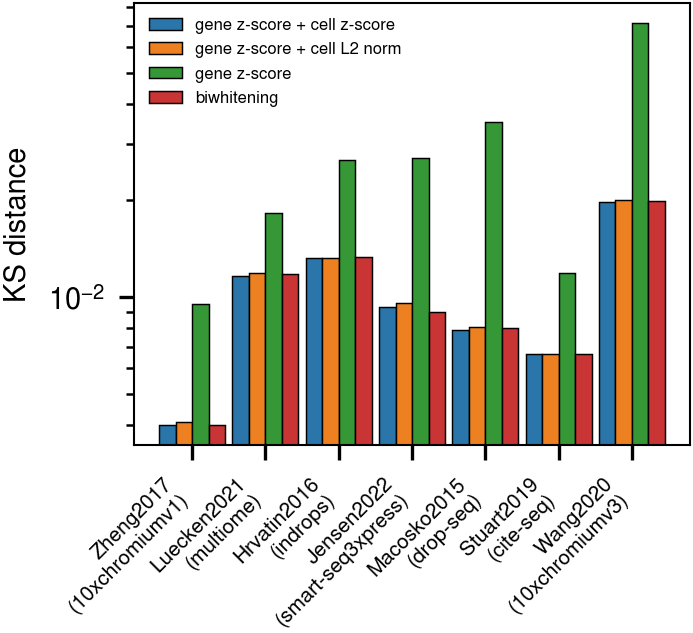

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scrna

json.dump(scores, open('figures/scalings_%d.json' % ngenes, 'w'))
#scores = json.load(open('figures/scalings.json'))
# Assuming scores is defined
data = scores
categories = list(data.keys())
methods = list(next(iter(data.values())).keys())

values = {method: [data[cat][method][0] for cat in categories] for method in methods}

x = np.arange(len(categories))  # label locations
width = 0.9 / len(methods)      # adaptive width based on number of methods

figsize = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(figsize=[figsize[0], 0.8*figsize[1]])

cmap = iter(sns.color_palette('tab10', desat=0.85))

for i, method in enumerate(methods):
    offset = (i - (len(methods) - 1) / 2) * width
    bar_positions = x + offset
    ax.bar(bar_positions, values[method], width=width, label=method,
           color=next(cmap), edgecolor='black', linewidth=0.35)

ax.set_ylabel('KS distance')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize = 5)
ax.tick_params(axis='y')

ax.legend(fontsize=4, loc='upper left', frameon=False)

fig.savefig('figures/scalings_%d.pdf' % ngenes, dpi=300)
